In [2]:
import pandas as pd
import re
import nltk
from nltk import pos_tag, word_tokenize
from nltk.chunk import RegexpParser

# 데이터 로드 및 첫 문장 추출 (이전 코드와 동일)
df = pd.read_csv("fake reviews dataset.csv")

def extract_first_sentence(text):
    match = re.search(r'^(.*?\.)', text)
    return match.group(1).strip() if match else text.strip()

df['first_sentence'] = df.apply(lambda row: extract_first_sentence(row['text_']) if row['label'] == 'OR' else row['text_'], axis=1)

# 구문 분석을 위한 함수 정의
def analyze_sentence(sentence):
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)
    
    # 구문 규칙 정의
    grammar = """
      NP: {<DT>?<JJ>*<NN>}   # 명사구
      VP: {<VB.*><NP|PP>*}   # 동사구
      PP: {<IN><NP>}         # 전치사구
    """
    
    parser = RegexpParser(grammar)
    parse_tree = parser.parse(pos_tags)
    
    return parse_tree

# AI 작성 리뷰(CG)에 대해 구문 분석 수행
df['parse_tree'] = df[df['label'] == 'OR']['first_sentence'].apply(analyze_sentence)

# 결과 출력 (예시로 첫 5개 행만 출력)
for i, row in df[df['label'] == 'OR'].head().iterrows():
    print(f"Original: {row['text_']}")
    print(f"First Sentence: {row['first_sentence']}")
    print("Parse Tree:")
    print(row['parse_tree'])
    print("\n" + "="*50 + "\n")


Original: These are just perfect, exactly what I was looking for.
First Sentence: These are just perfect, exactly what I was looking for.
Parse Tree:
(S
  These/DT
  (VP are/VBP)
  just/RB
  perfect/JJ
  ,/,
  exactly/RB
  what/WP
  I/PRP
  (VP was/VBD)
  (VP looking/VBG)
  for/IN
  ./.)


Original: Such a great purchase can't beat it for the price
First Sentence: Such a great purchase can't beat it for the price
Parse Tree:
(S
  Such/JJ
  (NP a/DT great/JJ purchase/NN)
  ca/MD
  n't/RB
  (VP beat/VB)
  it/PRP
  (PP for/IN (NP the/DT price/NN)))


Original: What can you say--- cheap and it works as intended.
First Sentence: What can you say--- cheap and it works as intended.
Parse Tree:
(S
  What/WP
  can/MD
  you/PRP
  (VP say/VB)
  --/:
  -/:
  (NP cheap/NN)
  and/CC
  it/PRP
  (VP works/VBZ)
  as/RB
  (VP intended/VBN)
  ./.)


Original: These are so nice, sturdy, like the color choices too.
First Sentence: These are so nice, sturdy, like the color choices too.
Parse Tree:
(S
  Thes

In [3]:
import pandas as pd
import re

# CSV 파일 로드
df = pd.read_csv("fake reviews dataset.csv")

# 문법적 오류나 어색한 표현을 찾는 함수
def find_errors(text):
    errors = 0
    # 문장 시작이 소문자인 경우
    if text[0].islower():
        errors += 1
    # 문장 끝에 구두점이 없는 경우
    if not text.strip().endswith(('.', '!', '?')):
        errors += 1
    # 중복 구두점
    if re.search(r'[.!?]{2,}', text):
        errors += 1
    # 'a' 다음에 모음으로 시작하는 단어가 오는 경우
    if re.search(r'\ba\s+[aeiou]', text, re.IGNORECASE):
        errors += 1
    # 'an' 다음에 자음으로 시작하는 단어가 오는 경우
    if re.search(r'\ban\s+[^aeiou]', text, re.IGNORECASE):
        errors += 1
    return errors > 0

# label별로 오류가 있는 리뷰 카운트
error_counts = df.groupby('label').apply(lambda x: x['text_'].apply(find_errors).sum())
total_counts = df['label'].value_counts()

# 결과 출력
for label in error_counts.index:
    error_count = error_counts[label]
    total_count = total_counts[label]
    error_ratio = error_count / total_count
    print(f"{label} 리뷰:")
    print(f"  오류가 있는 리뷰 수: {error_count}")
    print(f"  전체 리뷰 수: {total_count}")
    print(f"  오류 비율: {error_ratio:.2%}")
    print()

# 차이 계산
cg_ratio = error_counts['CG'] / total_counts['CG']
or_ratio = error_counts['OR'] / total_counts['OR']
difference = abs(cg_ratio - or_ratio)

print(f"AI 생성 리뷰(CG)와 인간 작성 리뷰(OR)의 오류 비율 차이: {difference:.2%}")
print(f"{'AI 생성 리뷰' if cg_ratio > or_ratio else '인간 작성 리뷰'}가 더 많은 오류를 포함하고 있습니다.")


CG 리뷰:
  오류가 있는 리뷰 수: 13864
  전체 리뷰 수: 20216
  오류 비율: 68.58%

OR 리뷰:
  오류가 있는 리뷰 수: 5624
  전체 리뷰 수: 20216
  오류 비율: 27.82%

AI 생성 리뷰(CG)와 인간 작성 리뷰(OR)의 오류 비율 차이: 40.76%
AI 생성 리뷰가 더 많은 오류를 포함하고 있습니다.


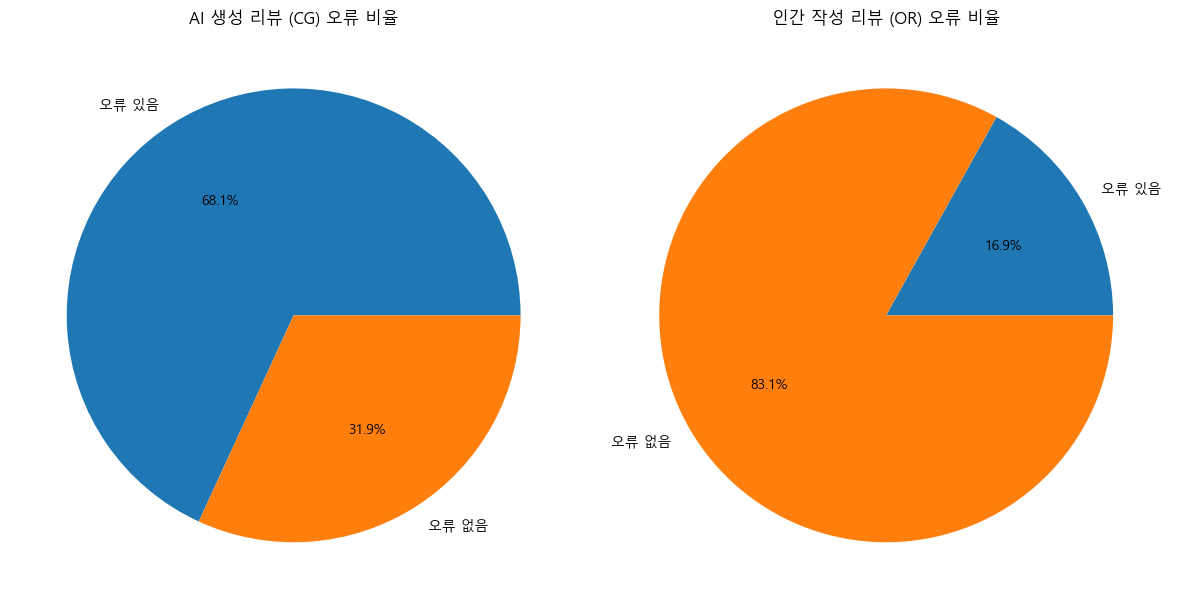

AI 생성 리뷰(CG)와 인간 작성 리뷰(OR)의 오류 비율 차이: 51.21%
AI 생성 리뷰가 더 많은 오류를 포함하고 있습니다.


In [9]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# CSV 파일 로드
df = pd.read_csv("fake reviews dataset.csv")

# 문법적 오류나 어색한 표현을 찾는 함수
def find_errors(text):
    errors = 0
    # 문장 시작이 소문자인 경우
    if text[0].islower():
        errors += 1
    # 문장 끝에 구두점이 없는 경우
    if not text.strip().endswith(('.', '!', '?')):
        errors += 1
    # 'a' 다음에 모음으로 시작하는 단어가 오는 경우
    if re.search(r'\ba\s+[aeiou]', text, re.IGNORECASE):
        errors += 1
    # 'an' 다음에 자음으로 시작하는 단어가 오는 경우
    if re.search(r'\ban\s+[^aeiou]', text, re.IGNORECASE):
        errors += 1
    return errors > 0

# label별로 오류가 있는 리뷰 카운트
error_counts = df.groupby('label').apply(lambda x: x['text_'].apply(find_errors).sum())
total_counts = df['label'].value_counts()
error_ratios = error_counts / total_counts

# 결과 시각화 (파이 차트)
plt.figure(figsize=(12, 6))

# AI 생성 리뷰 (CG) 파이 차트
plt.subplot(1, 2, 1)
plt.pie([error_ratios['CG'], 1 - error_ratios['CG']], labels=['오류 있음', '오류 없음'], autopct='%1.1f%%')
plt.title('AI 생성 리뷰 (CG) 오류 비율')

# 인간 작성 리뷰 (OR) 파이 차트
plt.subplot(1, 2, 2)
plt.pie([error_ratios['OR'], 1 - error_ratios['OR']], labels=['오류 있음', '오류 없음'], autopct='%1.1f%%')
plt.title('인간 작성 리뷰 (OR) 오류 비율')

plt.tight_layout()
plt.show()

# 차이 계산 및 출력
difference = abs(error_ratios['CG'] - error_ratios['OR'])
print(f"AI 생성 리뷰(CG)와 인간 작성 리뷰(OR)의 오류 비율 차이: {difference:.2%}")
print(f"{'AI 생성 리뷰' if error_ratios['CG'] > error_ratios['OR'] else '인간 작성 리뷰'}가 더 많은 오류를 포함하고 있습니다.")

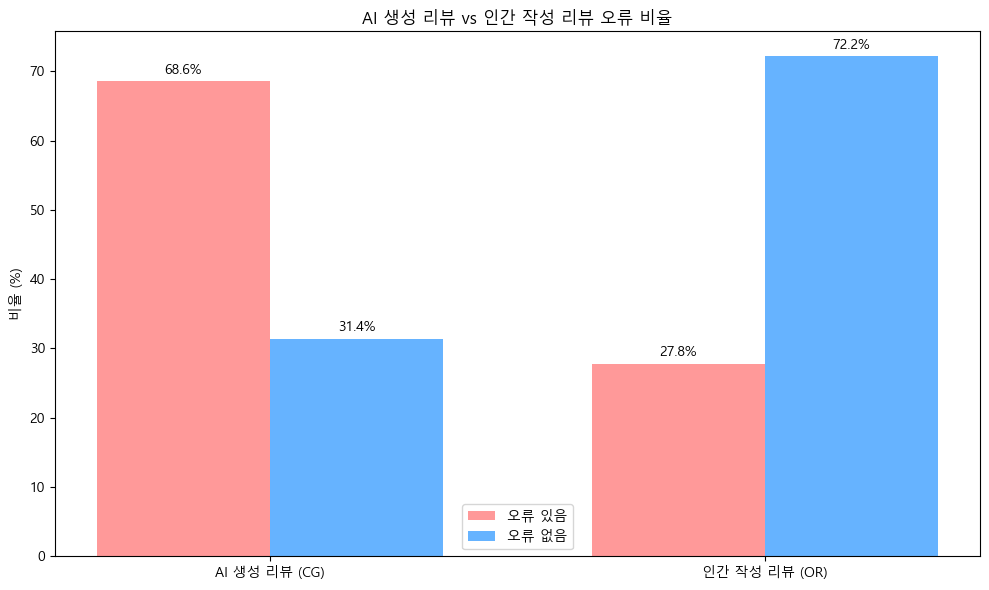

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 로드 및 오류 분석 (이전 코드와 동일)
df = pd.read_csv("fake reviews dataset.csv")
# ... (find_errors 함수 정의 및 오류 비율 계산)

# 결과 시각화 (그룹화된 막대 그래프)
labels = ['AI 생성 리뷰 (CG)', '인간 작성 리뷰 (OR)']
error_percentages = [error_ratios['CG'] * 100, error_ratios['OR'] * 100]
no_error_percentages = [(1 - error_ratios['CG']) * 100, (1 - error_ratios['OR']) * 100]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, error_percentages, width, label='오류 있음', color='#ff9999')
rects2 = ax.bar(x + width/2, no_error_percentages, width, label='오류 없음', color='#66b3ff')

ax.set_ylabel('비율 (%)')
ax.set_title('AI 생성 리뷰 vs 인간 작성 리뷰 오류 비율')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# 막대 위에 퍼센트 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 포인트 수직 오프셋
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# 차이 계산 및 출력 (이전과 동일)


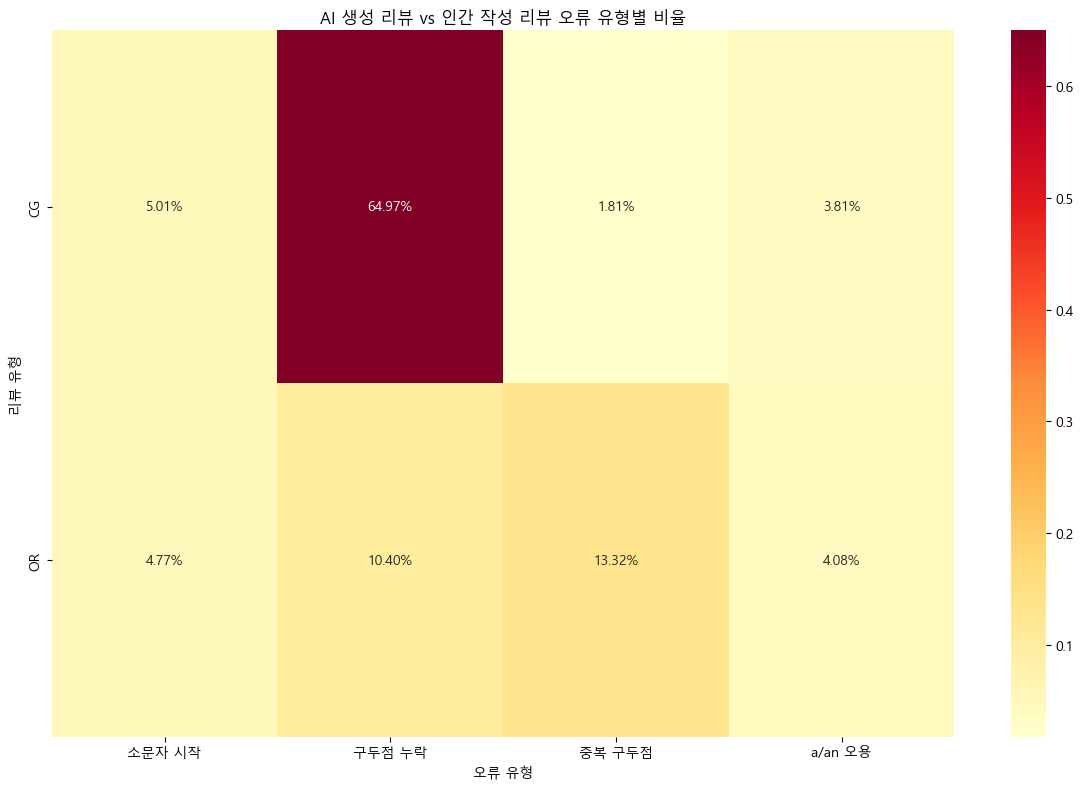

전체 오류 비율:
label
CG    0.188996
OR    0.081421
dtype: float64

AI 생성 리뷰(CG)와 인간 작성 리뷰(OR)의 전체 오류 비율 차이: 10.76%
AI 생성 리뷰가 전체적으로 더 많은 오류를 포함하고 있습니다.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 로드
df = pd.read_csv("fake reviews dataset.csv")

# 오류 유형별 검사 함수
def check_errors(text):
    errors = {
        '소문자 시작': text[0].islower(),
        '구두점 누락': not text.strip().endswith(('.', '!', '?')),
        '중복 구두점': bool(re.search(r'[.!?]{2,}', text)),
        'a/an 오용': bool(re.search(r'\ba\s+[aeiou]|\ban\s+[^aeiou]', text, re.IGNORECASE))
    }
    return pd.Series(errors)

# 각 리뷰에 대해 오류 유형 검사
error_data = df.groupby('label')['text_'].apply(lambda x: x.apply(check_errors).mean()).unstack()

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(error_data, annot=True, cmap='YlOrRd', fmt='.2%')
plt.title('AI 생성 리뷰 vs 인간 작성 리뷰 오류 유형별 비율')
plt.ylabel('리뷰 유형')
plt.xlabel('오류 유형')

plt.tight_layout()
plt.show()

# 전체 오류 비율 계산 및 출력
total_error_ratios = error_data.mean(axis=1)
print("전체 오류 비율:")
print(total_error_ratios)

difference = abs(total_error_ratios['CG'] - total_error_ratios['OR'])
print(f"\nAI 생성 리뷰(CG)와 인간 작성 리뷰(OR)의 전체 오류 비율 차이: {difference:.2%}")
print(f"{'AI 생성 리뷰' if total_error_ratios['CG'] > total_error_ratios['OR'] else '인간 작성 리뷰'}가 전체적으로 더 많은 오류를 포함하고 있습니다.")
